# Install Necessary Libs 

In [1]:
%pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [3]:
np.random.seed(42)
x,y = make_regression(n_samples=300, n_features=1, noise=10, random_state=42)


In [4]:
y = y + 2*x.flatten()**2 - 3*x.flatten()**3 + np.random.normal(0,15,len(y))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print("Dataset Overview: ")
print(f"Training sample: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")

Dataset Overview: 
Training sample: 240
Test samples: 60


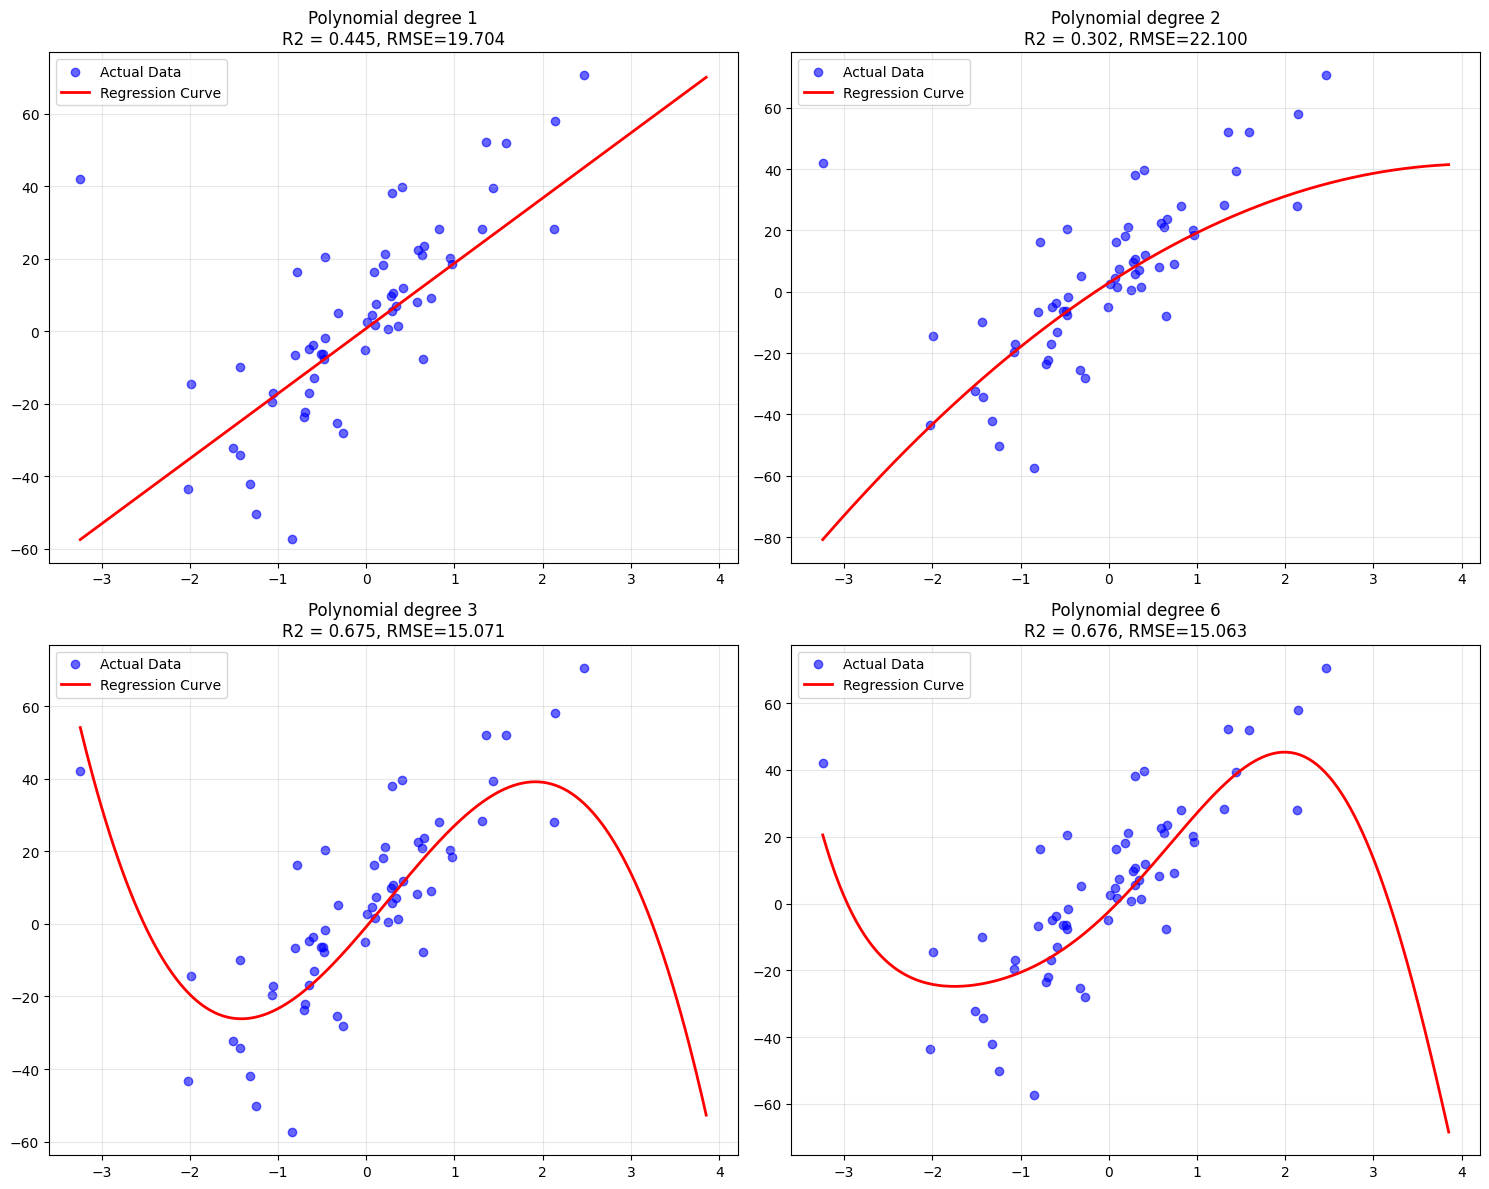

In [5]:
fig,axes = plt.subplots(2,2, figsize=(15,12))
axes = axes.flatten()

degrees = [1,2,3,6]
results = {}

for i, degree in enumerate(degrees):
    poly_feat = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    
    
    model = Pipeline([
        ('poly', poly_feat),
        ('linear', lr)
    ])
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[degree] = {'r2': r2, 'rmse': rmse}
    
    x_curve = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    y_curve = model.predict(x_curve)
    
    ax = axes[i]
    ax.scatter(x_test, y_test, color='blue', alpha=0.6, label="Actual Data")
    ax.plot(x_curve,y_curve, color="red", linewidth=2, label="Regression Curve")
    
    ax.set_title(f"Polynomial degree {degree}\nR2 = {r2:.3f}, RMSE={rmse:.3f}")
    ax.set_label('Feature X')
    ax.set_label('Feature Y')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
print("Polynomial reg comparsion: ")

for degree in degrees: 
    print(f"Degree {degree}: R2 = {results[degree]['r2']:.4f}, RMSE: {results[degree]['rmse']:.4f}")

Polynomial reg comparsion: 
Degree 1: R2 = 0.4448, RMSE: 19.7044
Degree 2: R2 = 0.3015, RMSE: 22.1002
Degree 3: R2 = 0.6752, RMSE: 15.0708
Degree 6: R2 = 0.6755, RMSE: 15.0634


In [7]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred_lin = lm.predict(x_test)
linear_r2 = r2_score(y_test, y_pred_lin)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(f"\nSimple Linear Regression: R² = {linear_r2:.4f}, RMSE = {linear_rmse:.4f}")



Simple Linear Regression: R² = 0.4448, RMSE = 19.7044


In [8]:
best_degree  = max(results, key=lambda x: results[x]['r2'])
print(f"\nBest polynomial degree: {best_degree} (R2= {results[best_degree]['r2']:.4f})")
print(f"Detailed analysis of degree: {best_degree} model")


Best polynomial degree: 6 (R2= 0.6755)
Detailed analysis of degree: 6 model


In [9]:
best_poly = PolynomialFeatures(degree=best_degree)
best_model = LinearRegression()

x_poly = best_poly.fit_transform(x_train)
best_model.fit(x_poly, y_train)

coefficients = best_model.coef_
intercept = best_model.intercept_

print("Model coefficients: ")
print(f"Intercept: {intercept:.4f}")

for i, coef in enumerate(coefficients): 
    if i ==0: 
        continue
    print(f"Coeffcient for x^{i}: {coef:.4f}")

Model coefficients: 
Intercept: -2.4117
Coeffcient for x^1: 25.5711
Coeffcient for x^2: 6.6549
Coeffcient for x^3: -1.5776
Coeffcient for x^4: -1.0434
Coeffcient for x^5: -0.1172
Coeffcient for x^6: 0.0478


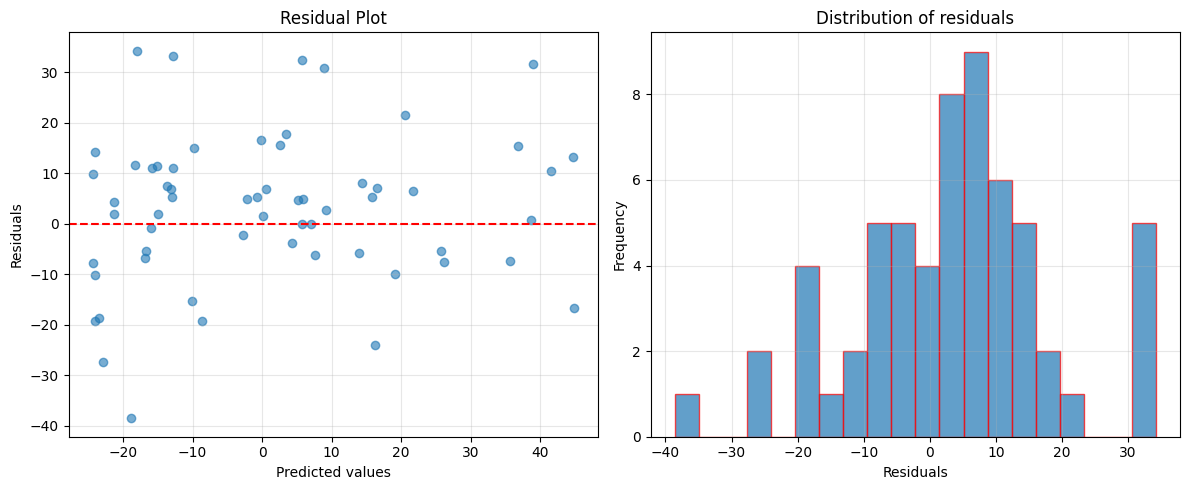

In [10]:
y_pred_best = best_model.predict(best_poly.transform(x_test))
residuals =  y_test - y_pred_best

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_pred_best, residuals,alpha=0.6 )
plt.axhline(y=0, color='red', linestyle="--")
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.hist(residuals, bins=20, edgecolor="red", alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of residuals')
plt.grid(True,alpha=0.3)

plt.tight_layout()
plt.show()

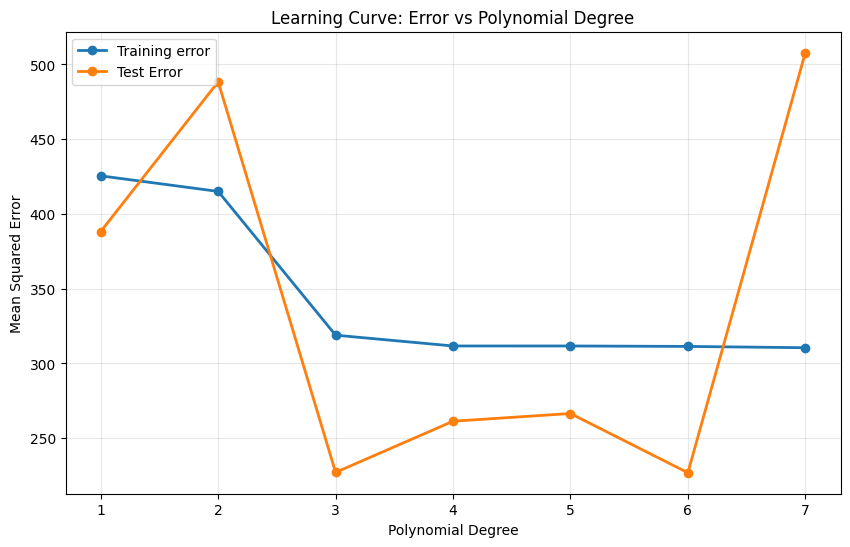

In [11]:
train_errors = []
test_errors =[]

for degree in range(1,8): 
    poly = PolynomialFeatures(degree=degree)
    model = LinearRegression()
    
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)
    
    model.fit(x_poly_train,y_train)
    
    train_pred = model.predict(x_poly_train)
    test_pred = model.predict(x_poly_test)
    
    train_errors.append(mean_squared_error(y_train,train_pred))
    test_errors.append(mean_squared_error(y_test,test_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,8), train_errors, 'o-', label='Training error',linewidth=2)
plt.plot(range(1, 8), test_errors, 'o-', label='Test Error', linewidth=2)
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve: Error vs Polynomial Degree')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [12]:
print("Polynomial regression allows us to capture non-linear relationships")
print("between features and target variables by making poly features")
print("\nInsights: ")
print(f"1. Simple LR: R2: {linear_r2:.4f}")
print(f"2. Best polynomial regression: {results[best_degree]['r2']:.4f}")
print(f"3. Improvement: {(results[best_degree]['r2']- linear_r2)*100:.1f}%")


Polynomial regression allows us to capture non-linear relationships
between features and target variables by making poly features

Insights: 
1. Simple LR: R2: 0.4448
2. Best polynomial regression: 0.6755
3. Improvement: 23.1%
